Nivell 1

Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.

1. Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.

In [1]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import pymysql
!pip install cryptography


# Conexión a MySQL usando pymysql
conexion = pymysql.connect(
    host="localhost",
    user="root",
    password="Newage2025",
    database="data"
)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Obtener lista de tablas
tables = pd.read_sql("SHOW TABLES", conexion)
print(tables)

         Tables_in_data
0             companies
1           credit_card
2        estat_targetes
3              products
4          transactions
5  transactions_product
6                 users


C:\Users\nuez_\AppData\Local\Temp\ipykernel_16636\4287451642.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql("SHOW TABLES", conexion)


In [4]:
# creamos un diccionario para introducir todas las tablas 
dfs={}
for table_name in tables.iloc[:, 0]:
    df=pd.read_sql(f"SELECT * From {table_name}", conexion)
    dfs[table_name]= df
    print(f" - {table_name} cargada: {len(df)} filas")

 - companies cargada: 100 filas
 - credit_card cargada: 5000 filas
 - estat_targetes cargada: 5000 filas
 - products cargada: 100 filas


C:\Users\nuez_\AppData\Local\Temp\ipykernel_16636\2131620058.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(f"SELECT * From {table_name}", conexion)


 - transactions cargada: 100000 filas
 - transactions_product cargada: 253391 filas
 - users cargada: 5000 filas


In [5]:
conexion.close
print("conexion cerrada")



conexion cerrada


In [6]:
# Camnbiamos nombres para poder trabajar con mayor comodidad
companies = dfs['companies']
credit_card = dfs['credit_card']
estat_targetes = dfs['estat_targetes']
products = dfs['products']
trans = dfs['transactions']
trans_product = dfs['transactions_product']
users = dfs['users']

2. Per a cada ítem, crea una visualització adequada segons les variables especificades. Interpreta els resultats segons les teves dades.

Recorda: quan seleccionis les columnes, pensa sempre en el mètode que faràs servir i inclou les que calguin per a la funció de visualització que vulguis utilitzar.

Una variable numèrica.

In [7]:
trans

,id,card_id,bussiness_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.1999,1.43554
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.5972,12.22180
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.7573,-95.37960
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.5489,-113.50300
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.2084,5.69081
...,...,...,...,...,...,...,...,...,...,...
99995,FFF9E3CE-234E-408C-A8EF-F9CAD577224A,CcS-5010,b-2234,2022-12-17 20:57:55,247.39,0,"20, 42, 54, 46",429,52.5223,13.40490
99996,FFFB270D-F53A-4D5D-9666-E5307C53CC84,CcS-7655,b-2522,2024-05-13 03:42:03,349.13,0,"30, 87, 5, 66",3074,39.0271,-8.10523
99997,FFFC9E8D-27C7-4ADE-98F2-7533EF4DF126,CcS-5589,b-2302,2019-10-30 02:31:37,234.22,0,"16, 49",1008,59.3327,18.07530
99998,FFFCF76D-ECF0-4985-A2D0-B2A7B75998FC,CcS-5261,b-2250,2023-06-17 19:10:30,148.91,0,18,680,52.0635,4.30862


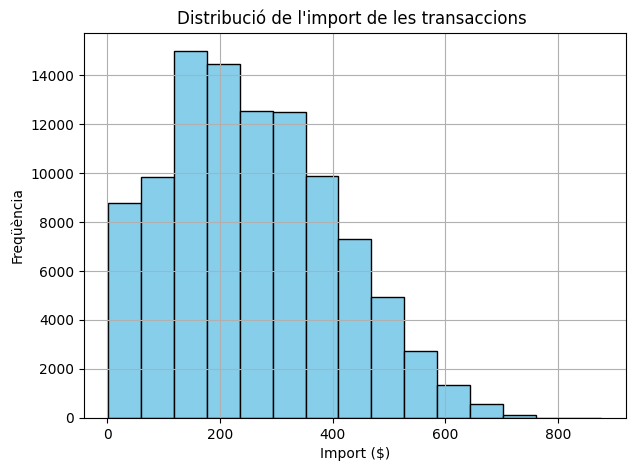

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.hist(trans['amount'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribució de l'import de les transaccions ")
plt.xlabel("Import ($)")
plt.ylabel("Freqüència")
plt.grid(True)
plt.show()

Dues variables numèriques.

In [9]:
from datetime import datetime, date
# creamos la columna Edad en users 
def edad (naixement):
    today=date.today()
    return today.year - naixement.year - ((today.month, today.day) < (naixement.month, naixement.day ))
users['Edad'] = users['birth_date'].apply(edad)

In [10]:
# Renombramos la columna de users y la ponemos como indice
users=users.rename(columns={'id' : 'user_id'})
users=users.set_index('user_id')
users

,name,surname,phone,email,birth_date,country,city,postal_code,address,Edad
user_id,,,,,,,,,,
1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,New York,10001,348-7818 Sagittis St.,40
2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,1992-08-23,United States,Philadelphia,19101,903 Sit Ave,33
3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,1998-04-29,United States,Houston,77001,736-2063 Tellus St.,27
4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,1989-02-18,United States,Phoenix,85001,Ap #545-2244 Erat. Rd.,36
5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,1998-09-26,United States,Philadelphia,19101,341-2821 Ultrices Av.,27
...,...,...,...,...,...,...,...,...,...,...
4996,Busscl,Qishmnuz,+37-135-5556,busscl.qishmnuz@example.com,1978-01-26,Netherlands,Groningen,9711,206 Qishmnuz St,47
4997,Lfituf,Dazfyjnb,+92-468-5631,lfituf.dazfyjnb@example.com,1956-11-12,Netherlands,Eindhoven,5611,41 Dazfyjnb St,69
4998,Xmjnxt,Uugjkvne,+97-556-4320,xmjnxt.uugjkvne@example.com,2002-02-27,France,Marseille,13001,748 Uugjkvne St,23


In [11]:
# Realizamos la unión de las 2 tablas usando el metodo merge
trans_users= pd.merge(trans,users, how= "left", left_on="user_id", right_index=True)
trans_users

,id,card_id,bussiness_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,name,surname,phone,email,birth_date,country,city,postal_code,address,Edad
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.1999,1.43554,Gxnmjn,Fjycossj,+87-307-6702,gxnmjn.fjycossj@example.com,1996-01-28,France,Marseille,13001,471 Fjycossj St,29
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.5972,12.22180,Kvkvekp,Azofeyj,+84-509-6735,kvkvekp.azofeyj@example.com,1957-08-16,Italy,Milan,20100,93 Azofeyj Street,68
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.7573,-95.37960,Wolake,Ukynumly,+63-443-9528,wolake.ukynumly@example.com,1995-09-04,United States,Houston,77001,48 Ukynumly St,30
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.5489,-113.50300,Umhwoi,Ubmdxvmz,+38-316-6815,umhwoi.ubmdxvmz@example.com,1969-02-19,Canada,Edmonton,T5A 0A1,228 Ubmdxvmz St,56
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.2084,5.69081,Qpfyfa,Mtnpfdfq,+96-354-2022,qpfyfa.mtnpfdfq@example.com,1961-02-08,Netherlands,Groningen,9711,178 Mtnpfdfq St,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,FFF9E3CE-234E-408C-A8EF-F9CAD577224A,CcS-5010,b-2234,2022-12-17 20:57:55,247.39,0,"20, 42, 54, 46",429,52.5223,13.40490,Yshimq,Zpsjsleed,+41-970-7949,yshimq.zpsjsleed@example.com,1965-05-20,Germany,Berlin,10115,14 Zpsjsleed Street,60
99996,FFFB270D-F53A-4D5D-9666-E5307C53CC84,CcS-7655,b-2522,2024-05-13 03:42:03,349.13,0,"30, 87, 5, 66",3074,39.0271,-8.10523,Ggzjpa,Uirzjulh,+45-591-9299,ggzjpa.uirzjulh@example.com,1988-12-24,Portugal,Funchal,9000-001,553 Uirzjulh St,36
99997,FFFC9E8D-27C7-4ADE-98F2-7533EF4DF126,CcS-5589,b-2302,2019-10-30 02:31:37,234.22,0,"16, 49",1008,59.3327,18.07530,Securp,Faofvqfy,+76-822-2041,securp.faofvqfy@example.com,1957-11-13,Sweden,Stockholm,111 20,535 Faofvqfy St,68
99998,FFFCF76D-ECF0-4985-A2D0-B2A7B75998FC,CcS-5261,b-2250,2023-06-17 19:10:30,148.91,0,18,680,52.0635,4.30862,Dfrled,Vilqcjdl,+38-243-7637,dfrled.vilqcjdl@example.com,1969-12-18,Netherlands,The Hague,2511,373 Vilqcjdl St,55


In [12]:
# Creamos un nuevo data frame para graficar 
amount_edad = trans_users.groupby('Edad')['amount'].mean().reset_index()

In [13]:
correlacion=amount_edad.corr()
correlacion

,Edad,amount
Edad,1.000000,-0.068869
amount,-0.068869,1.000000


In [14]:
valor=correlacion.loc['Edad','amount']
valor

np.float64(-0.06886947263224727)

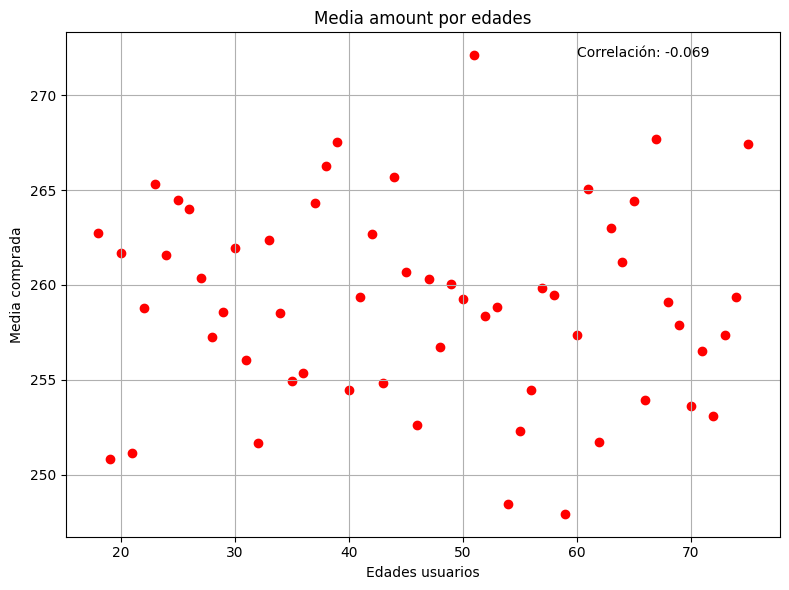

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(x=amount_edad['Edad'], y=amount_edad['amount'], c='red', marker='o')
plt.title('Media amount por edades')
plt.xlabel('Edades usuarios')
plt.ylabel('Media comprada')
plt.text(60, 272, s=f'Correlación: {valor:.3f}' )
plt.grid()
plt.tight_layout()
plt.show()

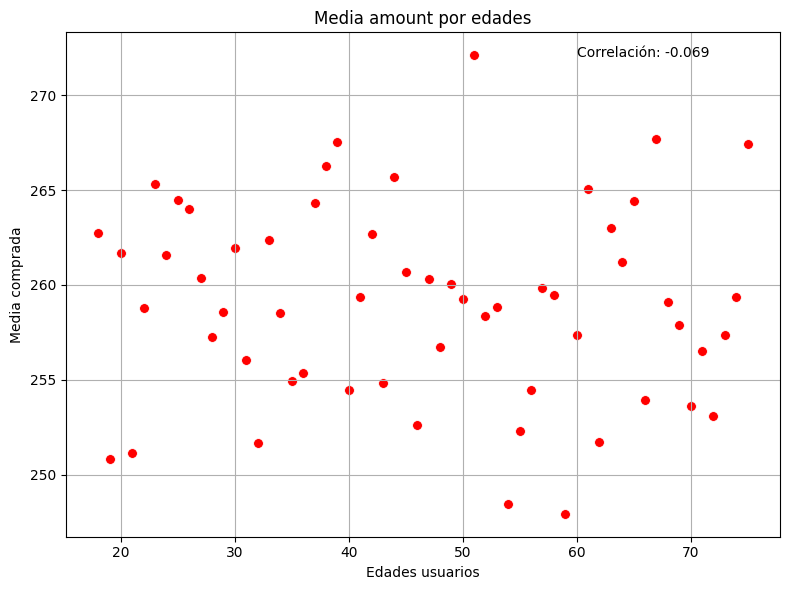

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=amount_edad, x='Edad', y='amount', color='red', marker='o', s=50)
plt.title('Media amount por edades')
plt.xlabel('Edades usuarios')
plt.ylabel('Media comprada')
plt.text(60, 272, s=f'Correlación: {valor:.3f}' )
plt.grid(True)
plt.tight_layout()
plt.show()

Una variable categòrica.

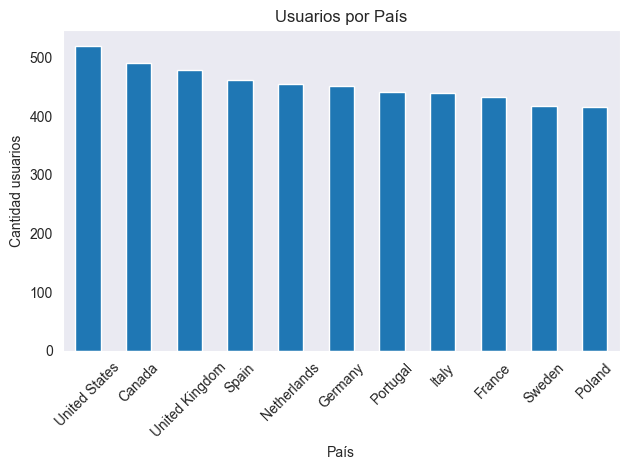

In [43]:
# gráfico de barras de una variable categórica en matplotlib

counts = users['country'].value_counts() # realizamos conteo x country y le asignamos la variable value_counts
counts.plot(kind='bar', rot=45)
plt.xlabel('País')
plt.ylabel('Cantidad usuarios')
plt.title('Usuarios por País')
plt.tight_layout()
plt.show()

In [18]:
counts

country
United States     520
Canada            490
United Kingdom    478
Spain             461
Netherlands       455
Germany           452
Portugal          441
Italy             439
France            432
Sweden            417
Poland            415
Name: count, dtype: int64

C:\Users\nuez_\AppData\Local\Temp\ipykernel_16636\3186298964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


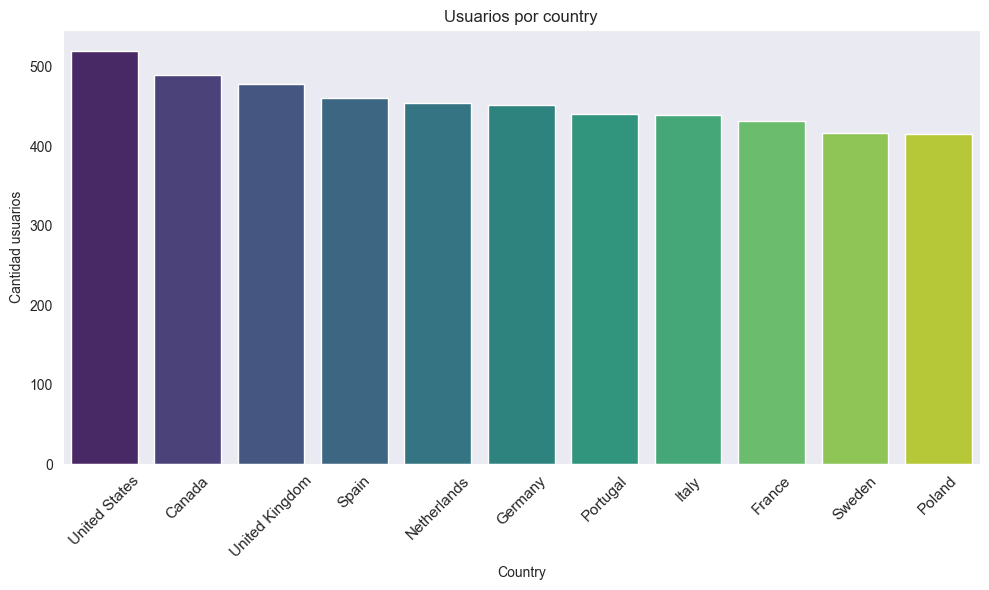

In [44]:
# Gráfico de barras en Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xticks(rotation=45, fontsize=11)
plt.xlabel('Country')
plt.ylabel('Cantidad usuarios')
plt.title('Usuarios por country')
plt.tight_layout()
plt.show()

Una variable categòrica i una numèrica.

C:\Users\nuez_\AppData\Local\Temp\ipykernel_16636\104895947.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=trans_top, x='country', y='amount', palette='Set2')


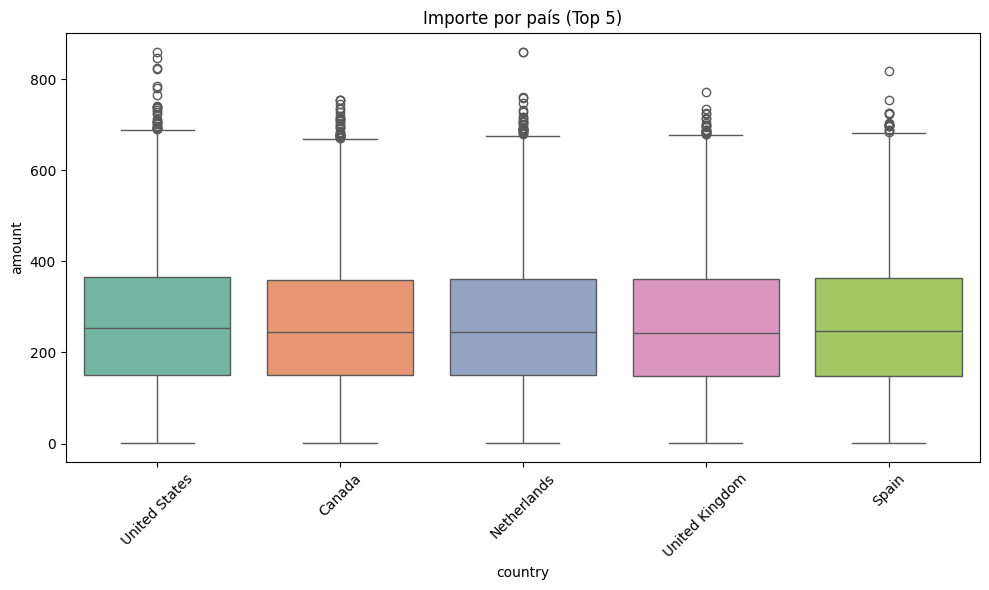

In [20]:
# Seleccionar los 5 países con más registros
top_paises = trans_users['country'].value_counts().nlargest(5).index

# Filtrar el DataFrame
trans_top = trans_users[trans_users['country'].isin(top_paises)]

# Crear el boxplot

plt.figure(figsize=(10,6))
sns.boxplot(data=trans_top, x='country', y='amount', palette='Set2')
plt.title('Importe por país (Top 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dues variables categòriques.

In [21]:
# Modificamos el nombre de la columna antes de realizar el merge
companies=companies.rename(columns={'company_id' : 'bussiness_id'})
companies=companies.set_index('bussiness_id')


In [22]:
trans_comp= pd.merge(trans,companies, how= "left", left_on="bussiness_id", right_index=True)


In [23]:
trans_comp['compra multiple'] = trans_comp['product_ids'].astype(str).apply(
    lambda x: 'Si' if len(x.split(',')) > 1 else 'No'
)
trans_comp

,id,card_id,bussiness_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,company_name,phone,email,country,website,compra multiple
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.1999,1.43554,Eget Tincidunt Dui Institute,05 35 93 32 44,eget.laoreet@hotmail.org,Netherlands,https://wikipedia.org/user/110\r,Si
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.5972,12.22180,Non Justo Corp.,09 30 54 14 44,urna.ut.tincidunt@yahoo.edu,Sweden,https://baidu.com/en-us\r,Si
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.7573,-95.37960,Neque Tellus Imperdiet Corp.,09 15 42 22 11,vestibulum.ante.ipsum@aol.edu,Ireland,https://whatsapp.com/sub/cars\r,Si
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.5489,-113.50300,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r,No
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.2084,5.69081,Mus Aenean Eget Foundation,06 25 15 52 43,mi.duis@hotmail.net,Sweden,https://instagram.com/group/9\r,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,FFF9E3CE-234E-408C-A8EF-F9CAD577224A,CcS-5010,b-2234,2022-12-17 20:57:55,247.39,0,"20, 42, 54, 46",429,52.5223,13.40490,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r,Si
99996,FFFB270D-F53A-4D5D-9666-E5307C53CC84,CcS-7655,b-2522,2024-05-13 03:42:03,349.13,0,"30, 87, 5, 66",3074,39.0271,-8.10523,Viverra Donec Foundation,03 33 12 32 73,dictum.eu@outlook.net,United Kingdom,https://nytimes.com/site\r,Si
99997,FFFC9E8D-27C7-4ADE-98F2-7533EF4DF126,CcS-5589,b-2302,2019-10-30 02:31:37,234.22,0,"16, 49",1008,59.3327,18.07530,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r,Si
99998,FFFCF76D-ECF0-4985-A2D0-B2A7B75998FC,CcS-5261,b-2250,2023-06-17 19:10:30,148.91,0,18,680,52.0635,4.30862,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r,No


In [24]:
trans_comp['cantidad de productos'] = trans_comp['product_ids'].astype(str).apply(
    lambda x: len(x.split(','))
)
trans_comp

,id,card_id,bussiness_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,company_name,phone,email,country,website,compra multiple,cantidad de productos
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.1999,1.43554,Eget Tincidunt Dui Institute,05 35 93 32 44,eget.laoreet@hotmail.org,Netherlands,https://wikipedia.org/user/110\r,Si,4
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.5972,12.22180,Non Justo Corp.,09 30 54 14 44,urna.ut.tincidunt@yahoo.edu,Sweden,https://baidu.com/en-us\r,Si,3
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.7573,-95.37960,Neque Tellus Imperdiet Corp.,09 15 42 22 11,vestibulum.ante.ipsum@aol.edu,Ireland,https://whatsapp.com/sub/cars\r,Si,4
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.5489,-113.50300,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r,No,1
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.2084,5.69081,Mus Aenean Eget Foundation,06 25 15 52 43,mi.duis@hotmail.net,Sweden,https://instagram.com/group/9\r,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,FFF9E3CE-234E-408C-A8EF-F9CAD577224A,CcS-5010,b-2234,2022-12-17 20:57:55,247.39,0,"20, 42, 54, 46",429,52.5223,13.40490,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r,Si,4
99996,FFFB270D-F53A-4D5D-9666-E5307C53CC84,CcS-7655,b-2522,2024-05-13 03:42:03,349.13,0,"30, 87, 5, 66",3074,39.0271,-8.10523,Viverra Donec Foundation,03 33 12 32 73,dictum.eu@outlook.net,United Kingdom,https://nytimes.com/site\r,Si,4
99997,FFFC9E8D-27C7-4ADE-98F2-7533EF4DF126,CcS-5589,b-2302,2019-10-30 02:31:37,234.22,0,"16, 49",1008,59.3327,18.07530,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r,Si,2
99998,FFFCF76D-ECF0-4985-A2D0-B2A7B75998FC,CcS-5261,b-2250,2023-06-17 19:10:30,148.91,0,18,680,52.0635,4.30862,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r,No,1


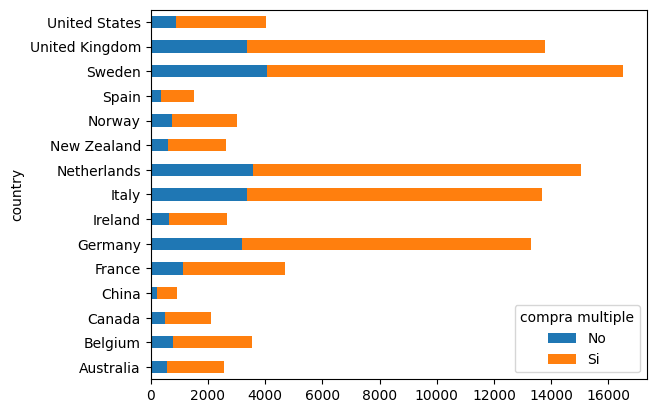

In [25]:
pd.crosstab(trans_comp['country'], trans_comp['compra multiple']).plot.barh(stacked=True) # si le ponemos ; al final no sale texto al principio
plt.show()

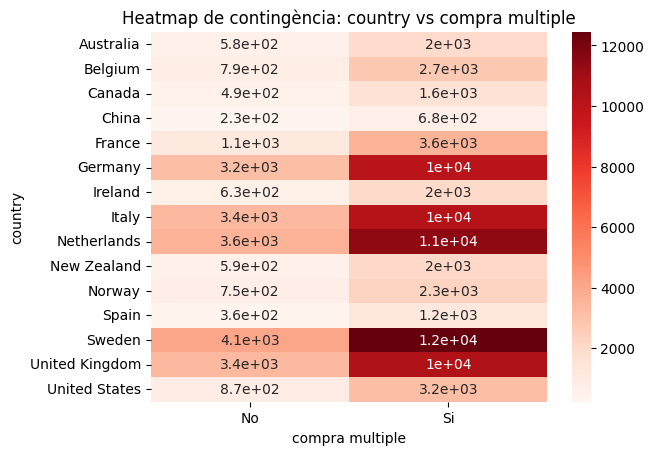

In [26]:
tabla = pd.crosstab(trans_comp['country'], trans_comp['compra multiple'])
sns.heatmap(tabla, annot=True, cmap='Reds')
plt.title('Heatmap de contingència: country vs compra multiple')
plt.show()

Tres variables combinades.

In [27]:
trans_comp.info()
trans_comp['Año']= trans_comp['timestamp'].dt.year
trans_comp['Mes']= trans_comp['timestamp'].dt.month_name(locale='es_ES')
trans_comp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     100000 non-null  object        
 1   card_id                100000 non-null  object        
 2   bussiness_id           100000 non-null  object        
 3   timestamp              100000 non-null  datetime64[ns]
 4   amount                 100000 non-null  float64       
 5   declined               100000 non-null  int64         
 6   product_ids            100000 non-null  object        
 7   user_id                100000 non-null  int64         
 8   lat                    100000 non-null  float64       
 9   longitude              100000 non-null  float64       
 10  company_name           100000 non-null  object        
 11  phone                  100000 non-null  object        
 12  email                  100000 non-null  objec

,id,card_id,bussiness_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,company_name,phone,email,country,website,compra multiple,cantidad de productos,Año,Mes
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.1999,1.43554,Eget Tincidunt Dui Institute,05 35 93 32 44,eget.laoreet@hotmail.org,Netherlands,https://wikipedia.org/user/110\r,Si,4,2024,Agosto
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.5972,12.22180,Non Justo Corp.,09 30 54 14 44,urna.ut.tincidunt@yahoo.edu,Sweden,https://baidu.com/en-us\r,Si,3,2016,Diciembre
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.7573,-95.37960,Neque Tellus Imperdiet Corp.,09 15 42 22 11,vestibulum.ante.ipsum@aol.edu,Ireland,https://whatsapp.com/sub/cars\r,Si,4,2020,Julio
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.5489,-113.50300,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r,No,1,2017,Septiembre
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.2084,5.69081,Mus Aenean Eget Foundation,06 25 15 52 43,mi.duis@hotmail.net,Sweden,https://instagram.com/group/9\r,No,1,2017,Enero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,FFF9E3CE-234E-408C-A8EF-F9CAD577224A,CcS-5010,b-2234,2022-12-17 20:57:55,247.39,0,"20, 42, 54, 46",429,52.5223,13.40490,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r,Si,4,2022,Diciembre
99996,FFFB270D-F53A-4D5D-9666-E5307C53CC84,CcS-7655,b-2522,2024-05-13 03:42:03,349.13,0,"30, 87, 5, 66",3074,39.0271,-8.10523,Viverra Donec Foundation,03 33 12 32 73,dictum.eu@outlook.net,United Kingdom,https://nytimes.com/site\r,Si,4,2024,Mayo
99997,FFFC9E8D-27C7-4ADE-98F2-7533EF4DF126,CcS-5589,b-2302,2019-10-30 02:31:37,234.22,0,"16, 49",1008,59.3327,18.07530,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r,Si,2,2019,Octubre
99998,FFFCF76D-ECF0-4985-A2D0-B2A7B75998FC,CcS-5261,b-2250,2023-06-17 19:10:30,148.91,0,18,680,52.0635,4.30862,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r,No,1,2023,Junio


In [28]:
top_comp_paises = trans_comp['country'].value_counts().nlargest(5).index

# Filtrar el DataFrame
trans_comp_top = trans_comp[trans_comp['country'].isin(top_comp_paises)]
trans_comp_top

,id,card_id,bussiness_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,company_name,phone,email,country,website,compra multiple,cantidad de productos,Año,Mes
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.1999,1.43554,Eget Tincidunt Dui Institute,05 35 93 32 44,eget.laoreet@hotmail.org,Netherlands,https://wikipedia.org/user/110\r,Si,4,2024,Agosto
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.5972,12.22180,Non Justo Corp.,09 30 54 14 44,urna.ut.tincidunt@yahoo.edu,Sweden,https://baidu.com/en-us\r,Si,3,2016,Diciembre
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.2084,5.69081,Mus Aenean Eget Foundation,06 25 15 52 43,mi.duis@hotmail.net,Sweden,https://instagram.com/group/9\r,No,1,2017,Enero
6,0009A151-9BCF-4E31-9053-A468FF77FAAB,CcS-7509,b-2546,2023-12-31 00:06:36,383.63,0,"93, 55, 28, 91",2928,51.9362,5.34265,Lorem Ipsum Dolor Corp.,09 03 14 76 02,augue.id@icloud.net,Sweden,https://baidu.com/site\r,Si,4,2023,Diciembre
8,000A1DEC-CDB6-4AB2-A619-71DAB8D4A262,CcS-6467,b-2558,2018-09-08 05:29:58,339.94,0,"46, 56, 73",1886,55.7425,-3.30009,Nulla Integer Vulputate Corp.,04 57 50 84 48,interdum@protonmail.org,Sweden,https://yahoo.com/one\r,Si,3,2018,Septiembre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,FFF9E3CE-234E-408C-A8EF-F9CAD577224A,CcS-5010,b-2234,2022-12-17 20:57:55,247.39,0,"20, 42, 54, 46",429,52.5223,13.40490,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r,Si,4,2022,Diciembre
99996,FFFB270D-F53A-4D5D-9666-E5307C53CC84,CcS-7655,b-2522,2024-05-13 03:42:03,349.13,0,"30, 87, 5, 66",3074,39.0271,-8.10523,Viverra Donec Foundation,03 33 12 32 73,dictum.eu@outlook.net,United Kingdom,https://nytimes.com/site\r,Si,4,2024,Mayo
99997,FFFC9E8D-27C7-4ADE-98F2-7533EF4DF126,CcS-5589,b-2302,2019-10-30 02:31:37,234.22,0,"16, 49",1008,59.3327,18.07530,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r,Si,2,2019,Octubre
99998,FFFCF76D-ECF0-4985-A2D0-B2A7B75998FC,CcS-5261,b-2250,2023-06-17 19:10:30,148.91,0,18,680,52.0635,4.30862,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r,No,1,2023,Junio


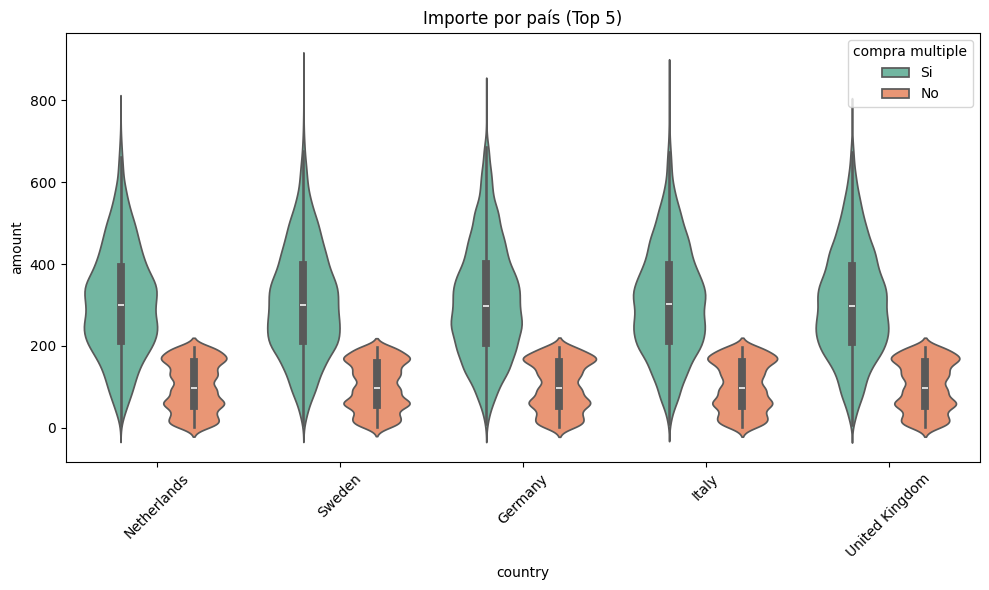

In [29]:
# Crear el boxplot

plt.figure(figsize=(10,6))
sns.violinplot(data=trans_comp_top, x='country', y='amount', hue='compra multiple', palette='Set2')
plt.title('Importe por país (Top 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
totales= trans_comp.groupby('country').agg(
    total_trans= ('id', 'count'),
    total_ventas=('amount', 'sum'),
    total_products= ('cantidad de productos', 'sum')
).sort_values(by= 'total_trans', ascending=False).reset_index().round(2)
totales

,country,total_trans,total_ventas,total_products
0,Sweden,16513,4251072.86,41495
1,Netherlands,15055,3890755.90,38153
2,United Kingdom,13776,3537120.34,34640
3,Italy,13668,3530071.81,34568
4,Germany,13291,3466842.93,33841
5,France,4700,1221902.17,11867
6,United States,4036,1069450.71,10434
7,Belgium,3531,922131.39,9075
8,Norway,3030,785907.27,7685
9,Ireland,2659,693054.42,6751


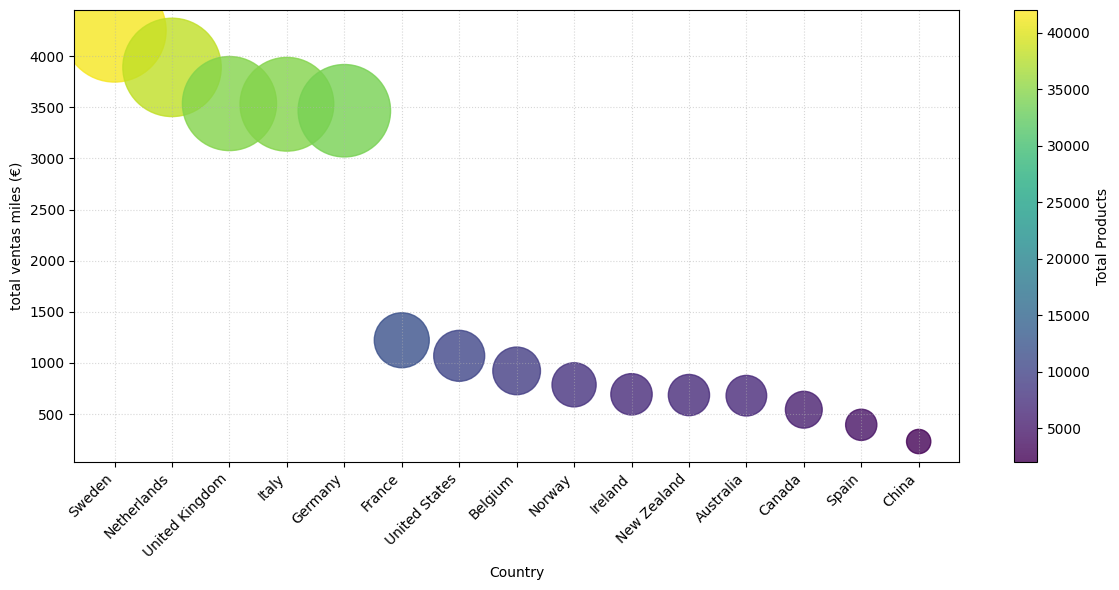

In [31]:
# Crear el gráfico
plt.figure(figsize=(12,6))
scatter = plt.scatter(
    x=totales['country'],
    y=totales['total_ventas']/1000,
    c=totales['total_products'],
    s=totales['total_trans']/3,  # Ajuste de tamaño
    cmap='viridis',
    alpha=0.8,
    vmin=2000,
    vmax=42000
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('total ventas miles (€)')
plt.colorbar(scatter, label='Total Products')
plt.grid(linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

Crea un Pairplot.

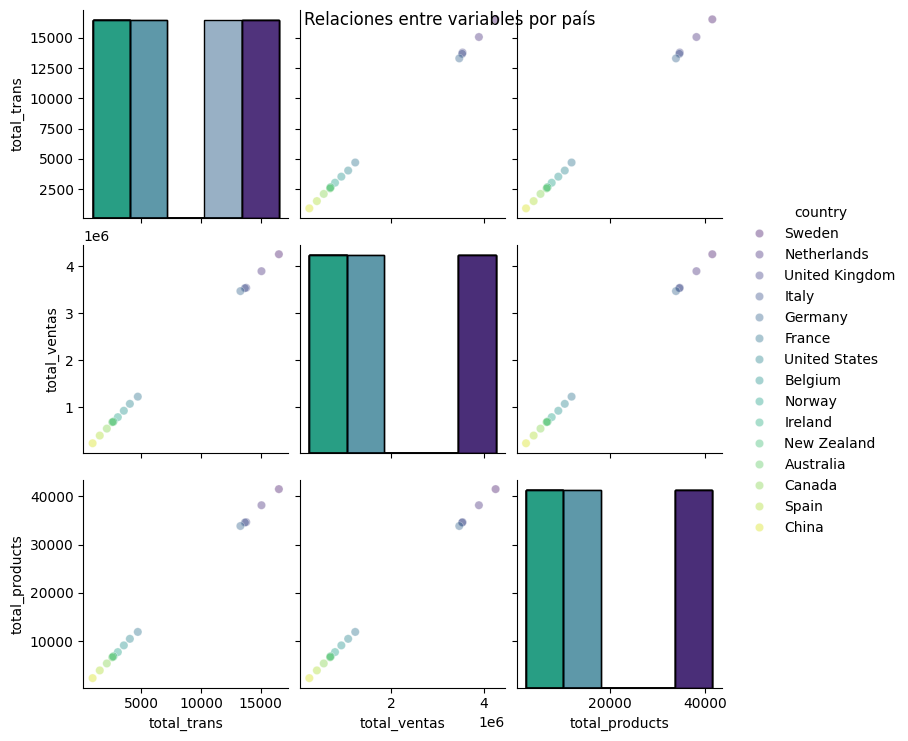

In [32]:
cols=['total_trans', 'total_ventas','total_products','country']
sns.pairplot(data=totales[cols],
              hue='country',
                palette='viridis',
                  diag_kind='hist',
                    plot_kws={'alpha':0.4} )
plt.suptitle("Relaciones entre variables por país")
plt.show()

Nivell 2
1. Representa la correlació d'algunes variables i interpreta els resultats segons les teves dades.

In [33]:
corr_matriz= trans_users[['amount','Edad','longitude','lat']].corr()
corr_matriz

,amount,Edad,longitude,lat
amount,1.000000,-0.001442,-0.005780,-0.008176
Edad,-0.001442,1.000000,0.079946,0.036097
longitude,-0.005780,0.079946,1.000000,0.504625
lat,-0.008176,0.036097,0.504625,1.000000


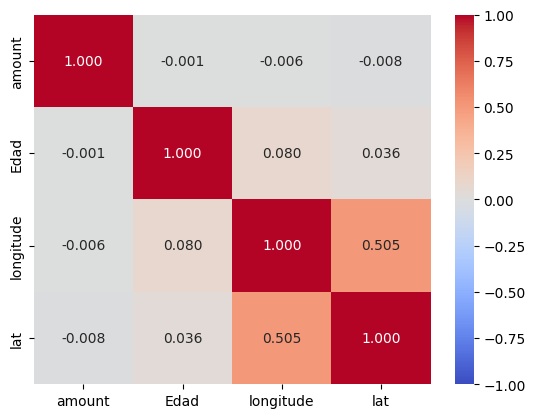

In [34]:
plt.Figure(figsize=(6,5))
sns.heatmap(corr_matriz,annot= True,cmap='coolwarm', vmin=-1,vmax=1,fmt='.3f')
plt.show()

En este heatmap de correlacion podemos obserbar que la unica relación que existe y es positiva es entre latitud y longitud ya que son las variables que ponen a un usuario en su lugar

2. Implementa un Jointplot per explorar la relació entre dues variables i interpreta els resultats segons les teves dades.

In [35]:
trans_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     100000 non-null  object        
 1   card_id                100000 non-null  object        
 2   bussiness_id           100000 non-null  object        
 3   timestamp              100000 non-null  datetime64[ns]
 4   amount                 100000 non-null  float64       
 5   declined               100000 non-null  int64         
 6   product_ids            100000 non-null  object        
 7   user_id                100000 non-null  int64         
 8   lat                    100000 non-null  float64       
 9   longitude              100000 non-null  float64       
 10  company_name           100000 non-null  object        
 11  phone                  100000 non-null  object        
 12  email                  100000 non-null  objec

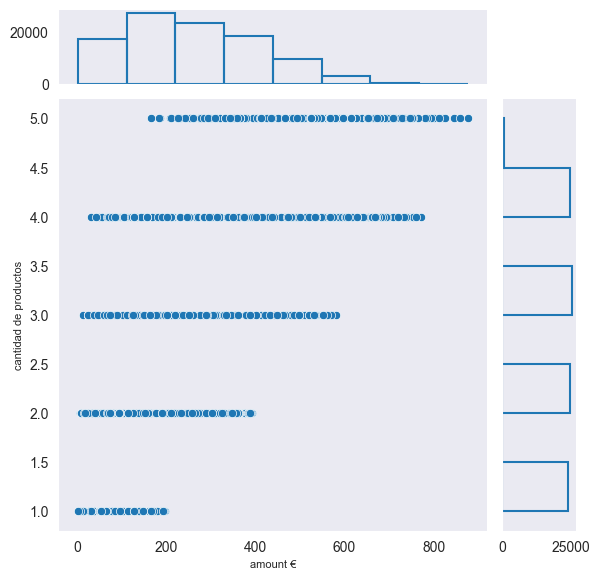

In [36]:
sns.set_style("dark")
g= sns.jointplot(x='amount', y='cantidad de productos',
                 data=trans_comp,
                 marginal_ticks=True,
                 marginal_kws=dict(bins=8, fill=False)
                 )
g.set_axis_labels('amount €','cantidad de productos', fontsize=8)
plt.show()

Podemos observar que la mayor cantidad de productos comprados se centra entre las compras con importe de  200 y los 300 € respectivamente ya que en ese rango tenemos compras de 1 hasta 5 productos y tambien observamos que las compras de 5 productos generan menor impacto en el importe total de ventas ya que podemos observar que las compras de 1,2.3 y 4 articulos generan mayor importe que las de 5 articulos